In [1]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import requests

url = "https://api.tomorrow.io/v4/timelines"

# replace the location using the corresponding lat,long

#location = "20.59,-78.96" #India
location = "52.35,-1.17" #England

# replace apikey with your own API key
querystring = {"location": location, "fields": ["temperature", "humidity", "windSpeed", "windDirection", "windGust", "precipitationType", "solarGHI", "visibility", "weatherCode"],
               "units": "metric", "timesteps": "1d", "apikey": "XhleblS5tUN8zytjCNdJs180dasVeufd"}

response = requests.request("GET",url, params=querystring)

#replace the nmae based on your own preferance

with open('Englanddata.txt','w', encoding='utf8') as f:
  f.write(response.text)



In [7]:
import pandas as pd
import json

In [8]:
with open('Indiadata.txt', 'r', encoding='utf8') as f:
    India = json.load(f)
with open('Englanddata.txt', 'r', encoding='utf8') as f:
    England = json.load(f)

In [9]:
inter = India['data']['timelines'][0]['intervals']
India_df = pd.DataFrame([x['values'] for x in inter])
India_df

,humidity,precipitationType,temperature,visibility,weatherCode,windDirection,windGust,windSpeed
0,82.53,1,29.10,16.00,1100,219.96,9.06,7.00
1,85.82,1,29.08,16.00,1100,221.83,12.91,9.83
2,78.96,1,28.98,16.00,1000,223.96,7.23,5.49
3,81.95,1,28.55,24.14,1001,141.88,7.23,7.03
4,91.09,1,28.42,24.14,4001,113.08,11.06,10.00
5,79.79,1,27.19,7.49,4200,138.46,10.19,8.66


In [10]:
inter = England['data']['timelines'][0]['intervals']
England_df = pd.DataFrame([x['values'] for x in inter])
England_df

,humidity,precipitationType,temperature,visibility,weatherCode,windDirection,windGust,windSpeed
0,97.46,0,18.38,16.00,1000,53.25,10.00,5.13
1,98.51,0,18.85,16.00,1000,57.06,8.93,4.86
2,97.27,1,17.84,16.00,1001,53.97,9.52,5.16
3,98.44,1,15.89,24.14,1001,57.42,10.82,5.80
4,97.69,0,17.61,24.14,1000,61.07,11.03,6.10
5,92.58,0,17.58,24.14,1000,67.08,11.33,6.38


As you can see, the weatherCode is based on a 4-digit integer, which is not intuitive. Let’s overwrite the column and map the code to the corresponding value.

In [11]:
weather_code_map = {0: 'Unknown',
1000: 'Clear',
1001: 'Cloudy',
1100: 'Mostly Clear',
1101: 'Partly Cloudy',
1102: 'Mostly Cloudy',
2000: 'Fog',
2100: 'Light Fog',
3000: 'Light Wind',
3001: 'Wind',
3002: 'Strong Wind',
4000: 'Drizzle',
4001: 'Rain',
4200: 'Light Rain',
4201: 'Heavy Rain',
5000: 'Snow',
5001: 'Flurries',
5100: 'Light Snow',
5101: 'Heavy Snow',
6000: 'Freezing Drizzle',
6001: 'Freezing Rain',
6200: 'Light Freezing Rain',
6201: 'Heavy Freezing Rain',
7000: 'Ice Pellets',
7101: 'Heavy Ice Pellets',
7102: 'Light Ice Pellets',
8000: 'Thunderstorm'}

India_df['weatherCode'] = [weather_code_map[x] for x in India_df['weatherCode']]
England_df['weatherCode'] = [weather_code_map[x] for x in England_df['weatherCode']]

India_df

,humidity,precipitationType,temperature,visibility,weatherCode,windDirection,windGust,windSpeed
0,82.53,1,29.10,16.00,Mostly Clear,219.96,9.06,7.00
1,85.82,1,29.08,16.00,Mostly Clear,221.83,12.91,9.83
2,78.96,1,28.98,16.00,Clear,223.96,7.23,5.49
3,81.95,1,28.55,24.14,Cloudy,141.88,7.23,7.03
4,91.09,1,28.42,24.14,Rain,113.08,11.06,10.00
5,79.79,1,27.19,7.49,Light Rain,138.46,10.19,8.66


In [12]:
England_df

,humidity,precipitationType,temperature,visibility,weatherCode,windDirection,windGust,windSpeed
0,97.46,0,18.38,16.00,Clear,53.25,10.00,5.13
1,98.51,0,18.85,16.00,Clear,57.06,8.93,4.86
2,97.27,1,17.84,16.00,Cloudy,53.97,9.52,5.16
3,98.44,1,15.89,24.14,Cloudy,57.42,10.82,5.80
4,97.69,0,17.61,24.14,Clear,61.07,11.03,6.10
5,92.58,0,17.58,24.14,Clear,67.08,11.33,6.38


In [13]:
#Obtain Statstical data

India_df.max() #Max value from each column

humidity              91.09
precipitationType         1
temperature            29.1
visibility            24.14
weatherCode            Rain
windDirection        223.96
windGust              12.91
windSpeed              10.0
dtype: object

In [14]:
England_df.max()

humidity              98.51
precipitationType         1
temperature           18.85
visibility            24.14
weatherCode          Cloudy
windDirection         67.08
windGust              11.33
windSpeed              6.38
dtype: object

In [16]:
#Compare India and England Minimum Temp

India_df['temperature'].min()

27.19

In [17]:
England_df['temperature'].min()

15.89

Statistical value of India

In [20]:
India_df.describe()

,humidity,precipitationType,temperature,visibility,windDirection,windGust,windSpeed
count,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,83.356667,1.0,28.553333,17.295000,176.528333,9.613333,8.001667
std,4.485228,0.0,0.725911,6.243031,50.722204,2.234284,1.790278
min,78.960000,1.0,27.190000,7.490000,113.080000,7.230000,5.490000
25%,80.330000,1.0,28.452500,16.000000,139.315000,7.687500,7.007500
50%,82.240000,1.0,28.765000,16.000000,180.920000,9.625000,7.845000
75%,84.997500,1.0,29.055000,22.105000,221.362500,10.842500,9.537500
max,91.090000,1.0,29.100000,24.140000,223.960000,12.910000,10.000000


Statistical value of England

In [21]:
England_df.describe()

,humidity,precipitationType,temperature,visibility,windDirection,windGust,windSpeed
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,96.991667,0.333333,17.691667,20.070000,58.308333,10.271667,5.571667
std,2.220373,0.516398,1.010216,4.458462,5.124925,0.941773,0.609210
min,92.580000,0.000000,15.890000,16.000000,53.250000,8.930000,4.860000
25%,97.317500,0.000000,17.587500,16.000000,54.742500,9.640000,5.137500
50%,97.575000,0.000000,17.725000,20.070000,57.240000,10.410000,5.480000
75%,98.252500,0.750000,18.245000,24.140000,60.157500,10.977500,6.025000
max,98.510000,1.000000,18.850000,24.140000,67.080000,11.330000,6.380000


In [24]:
#Value Count

India_df['weatherCode'].value_counts()

Mostly Clear    2
Clear           1
Cloudy          1
Rain            1
Light Rain      1
Name: weatherCode, dtype: int64

In [25]:
England_df['weatherCode'].value_counts()

Clear     4
Cloudy    2
Name: weatherCode, dtype: int64

Filter Based on Certain **Condition**

In [32]:
India_df[India_df['weatherCode'] == 'Mostly Clear']

,humidity,precipitationType,temperature,visibility,weatherCode,windDirection,windGust,windSpeed
0,82.53,1,29.10,16.0,Mostly Clear,219.96,9.06,7.00
1,85.82,1,29.08,16.0,Mostly Clear,221.83,12.91,9.83


In [33]:
England_df[England_df['weatherCode'] == 'Clear']

,humidity,precipitationType,temperature,visibility,weatherCode,windDirection,windGust,windSpeed
0,97.46,0,18.38,16.00,Clear,53.25,10.00,5.13
1,98.51,0,18.85,16.00,Clear,57.06,8.93,4.86
4,97.69,0,17.61,24.14,Clear,61.07,11.03,6.10
5,92.58,0,17.58,24.14,Clear,67.08,11.33,6.38


**Data Visualization**

In [34]:
import matplotlib
import matplotlib.pyplot as plt


<Axes: xlabel='Day', ylabel='Temperature'>

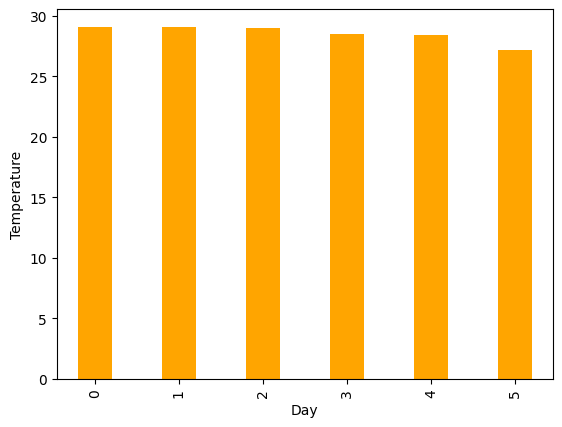

In [38]:
India_df['temperature'].plot.bar(xlabel = 'Day',ylabel='Temperature',color='Orange',width=0.4)

<Axes: xlabel='weaterCode', ylabel='Temperature'>

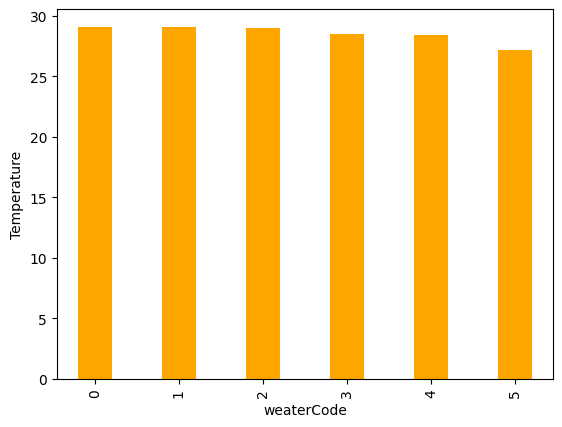

In [41]:
India_df['temperature'].plot.bar(x = 'weatherCode', y='temperature',xlabel = 'weaterCode',ylabel='Temperature',color='Orange',width=0.4)

<Axes: >

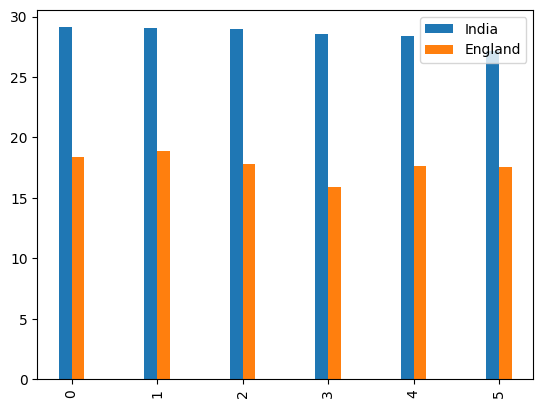

In [43]:
barplot = pd.DataFrame({'India': India_df['temperature'], 'England': England_df['temperature']})
barplot.plot.bar(width = 0.3)

<Axes: ylabel='Weather'>

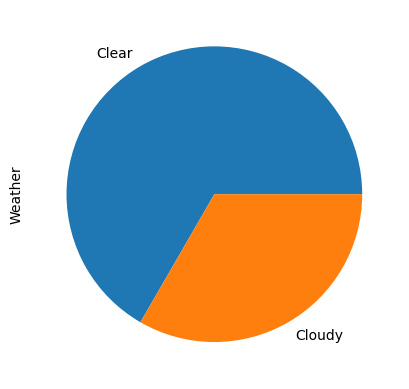

In [45]:
weather = dict(England_df['weatherCode'].value_counts())
series = pd.Series(weather.values(), index=weather.keys(), name="Weather")
series.plot.pie()

<Axes: ylabel='Weather'>

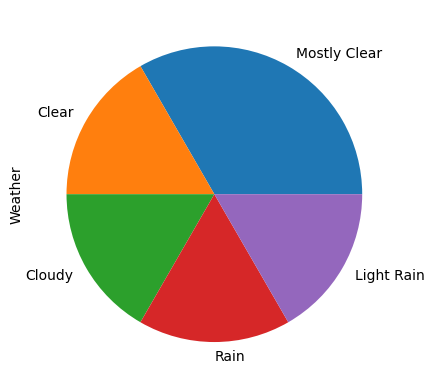

In [46]:
weather = dict(India_df['weatherCode'].value_counts())
series = pd.Series(weather.values(), index=weather.keys(), name="Weather")
series.plot.pie()

Q1.Find all the Unique weatherCode value in the India and England data.

In [47]:
India_df.nunique()

humidity             6
precipitationType    1
temperature          6
visibility           3
weatherCode          5
windDirection        6
windGust             5
windSpeed            6
dtype: int64

In [48]:
England_df.nunique()

humidity             6
precipitationType    2
temperature          6
visibility           2
weatherCode          2
windDirection        6
windGust             6
windSpeed            6
dtype: int64

Q2.Find the number of time when the 'weatherCode exactly clear'

In [49]:
India_df['weatherCode'].value_counts()

Mostly Clear    2
Clear           1
Cloudy          1
Rain            1
Light Rain      1
Name: weatherCode, dtype: int64

In [50]:
England_df['weatherCode'].value_counts()

Clear     4
Cloudy    2
Name: weatherCode, dtype: int64

Q3.Whats is the mean, standard Deviation and varience of humididty and temperature

In [52]:
India_df.humidity.mean()

83.35666666666667

In [53]:
England_df.humidity.mean()

96.99166666666667

In [54]:
India_df.temperature.mean()

28.55333333333333

In [55]:
England_df.temperature.mean()

17.691666666666666

In [56]:
India_df.humidity.std()

4.485227604778454

In [57]:
India_df.temperature.std()

0.7259109219915801

In [58]:
England_df.temperature.std()

1.0102161484883652

In [59]:
England_df.humidity.std()

2.220373091772342

In [61]:
India_df['temperature'].var()

0.5269466666666659

In [62]:
India_df['humidity'].var()

20.11726666666667

In [63]:
England_df['temperature'].var()

1.0205366666666669

In [64]:
England_df['temperature'].var()

1.0205366666666669

Q4.Find all the null values.

In [65]:
India_df.isnull().sum()

humidity             0
precipitationType    0
temperature          0
visibility           0
weatherCode          0
windDirection        0
windGust             0
windSpeed            0
dtype: int64

In [66]:
England_df.isnull().sum()

humidity             0
precipitationType    0
temperature          0
visibility           0
weatherCode          0
windDirection        0
windGust             0
windSpeed            0
dtype: int64

Q5.Rename the Column name windSpeed int0 windSpeed in Km/hr

In [67]:
India_df.rename(columns={'windSpeed' : 'windSpeed in km/hr'})

,humidity,precipitationType,temperature,visibility,weatherCode,windDirection,windGust,windSpeed in km/hr
0,82.53,1,29.10,16.00,Mostly Clear,219.96,9.06,7.00
1,85.82,1,29.08,16.00,Mostly Clear,221.83,12.91,9.83
2,78.96,1,28.98,16.00,Clear,223.96,7.23,5.49
3,81.95,1,28.55,24.14,Cloudy,141.88,7.23,7.03
4,91.09,1,28.42,24.14,Rain,113.08,11.06,10.00
5,79.79,1,27.19,7.49,Light Rain,138.46,10.19,8.66


Q6,Find the mean of humidity in each column

In [68]:
India_df.groupby('humidity').mean()

<ipython-input-68-dabde82e79ea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  India_df.groupby('humidity').mean()


,precipitationType,temperature,visibility,windDirection,windGust,windSpeed
humidity,,,,,,
78.96,1.0,28.98,16.00,223.96,7.23,5.49
79.79,1.0,27.19,7.49,138.46,10.19,8.66
81.95,1.0,28.55,24.14,141.88,7.23,7.03
82.53,1.0,29.10,16.00,219.96,9.06,7.00
85.82,1.0,29.08,16.00,221.83,12.91,9.83
91.09,1.0,28.42,24.14,113.08,11.06,10.00


In [69]:
England_df.groupby('humidity').mean()

<ipython-input-69-43f0db6c0627>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  England_df.groupby('humidity').mean()


,precipitationType,temperature,visibility,windDirection,windGust,windSpeed
humidity,,,,,,
92.58,0.0,17.58,24.14,67.08,11.33,6.38
97.27,1.0,17.84,16.00,53.97,9.52,5.16
97.46,0.0,18.38,16.00,53.25,10.00,5.13
97.69,0.0,17.61,24.14,61.07,11.03,6.10
98.44,1.0,15.89,24.14,57.42,10.82,5.80
98.51,0.0,18.85,16.00,57.06,8.93,4.86
